In [1]:
import pandas as pd
from sqlalchemy import create_engine, inspect
import matplotlib.pyplot as plt

In [3]:
# Create the database engine
engine = create_engine("sqlite:///data.db")

# Create query for unique combinations of borough and complaint_type
query = """
SELECT DISTINCT borough, 
       complaint_type
  FROM hpd311calls;
"""

# Load results of query to a dataframe
issues_and_boros = pd.read_sql(query, engine)

# Check assumption about issues and boroughs
print(issues_and_boros)

          borough    complaint_type
0           BRONX    HEAT/HOT WATER
1       MANHATTAN          PLUMBING
2       MANHATTAN    HEAT/HOT WATER
3        BROOKLYN    HEAT/HOT WATER
4          QUEENS    HEAT/HOT WATER
..            ...               ...
60      MANHATTAN  OUTSIDE BUILDING
61      MANHATTAN          ELEVATOR
62       BROOKLYN  OUTSIDE BUILDING
63  STATEN ISLAND            SAFETY
64  STATEN ISLAND  OUTSIDE BUILDING

[65 rows x 2 columns]


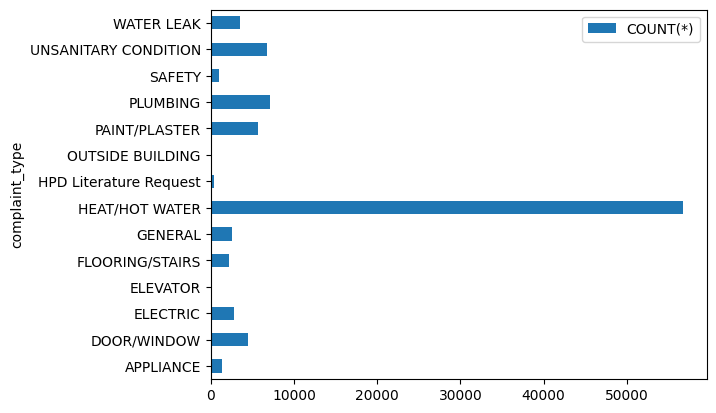

In [4]:
# Create query to get call counts by complaint_type
query = """
SELECT complaint_type, 
     COUNT(*)
  FROM hpd311calls
  GROUP BY complaint_type;
"""

# Create dataframe of call counts by issue
calls_by_issue = pd.read_sql(query, engine)

# Graph the number of calls for each housing issue
calls_by_issue.plot.barh(x="complaint_type")
plt.show()

In [6]:
# Create query to get temperature and precipitation by month
query = """
SELECT month, 
        MAX(tmax), 
        MIN(tmin),
        SUM(prcp)
  FROM weather 
 GROUP BY month;
"""

# Get dataframe of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)  MIN(tmin)  SUM(prcp)
0  December         61          9       2.21
1  February         78         16       5.83
2   January         61          5       2.18
3     March         62         27       5.17
